In [1]:
# loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv',skipinitialspace = True)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# checking the datatypes

In [15]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# checking the null values

In [16]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [17]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [18]:
df.shape

(158, 12)

In [22]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [28]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Making the dataframe for the normal data

In [114]:
df_nominal=df[['Region','Happiness Rank','Economy (GDP per Capita)','Health (Life Expectancy)','Family','Freedom','Trust (Government Corruption)','Generosity']].copy()

In [115]:
df_nominal.columns

Index(['Region', 'Happiness Rank', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Family', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

# Visualization of the data

In [116]:
x=df_nominal.drop(columns=['Country'],axis=1)
y=df_nominal['Country']

KeyError: "['Country'] not found in axis"

In [ ]:
# with the help of countplot we can see the data of each row 
sns.countplot(x='Region',data=df_nominal)
print(df_nominal['Region'].value_counts())

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64


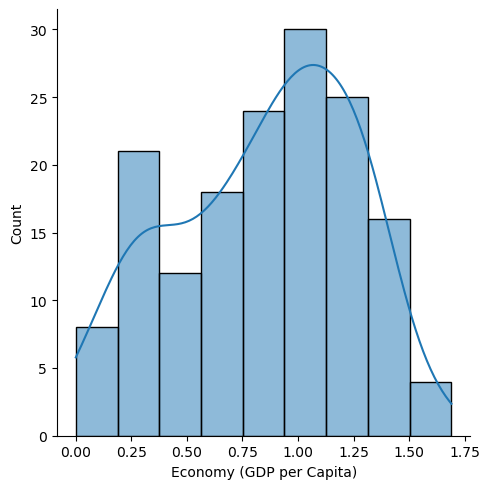

In [117]:
sns.displot(x='Economy (GDP per Capita)',data=df_nominal,kde=True)
print(df_nominal['Economy (GDP per Capita)'].value_counts())

0.92356    2
0.94143    1
0.60268    1
0.88213    1
0.83947    1
          ..
0.66098    1
0.64368    1
0.87337    1
0.73128    1
0.28443    1
Name: Health (Life Expectancy), Length: 157, dtype: int64


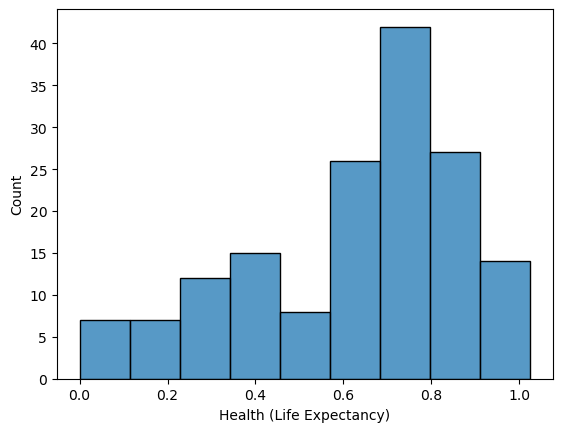

In [118]:
sns.histplot(x='Health (Life Expectancy)',data=df_nominal)
print(df_nominal['Health (Life Expectancy)'].value_counts())

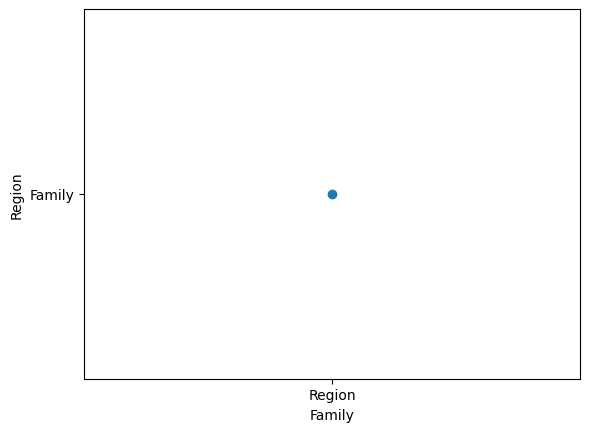

In [119]:
plt.xlabel('Family')
plt.ylabel('Region')
plt.scatter('Region','Family')
plt.show()

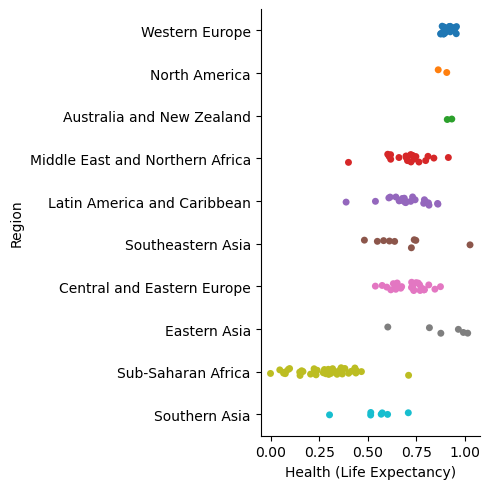

In [120]:
sns.catplot(x='Health (Life Expectancy)',y='Region',data=df_nominal)

In [121]:
df_nominal.describe()

,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy),Family,Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.846137,0.630259,0.991046,0.428615,0.143422,0.237296
std,45.754363,0.403121,0.247078,0.272369,0.150693,0.120034,0.126685
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,0.545808,0.439185,0.856823,0.328330,0.061675,0.150553
50%,79.500000,0.910245,0.696705,1.029510,0.435515,0.107220,0.216130
75%,118.750000,1.158448,0.811013,1.214405,0.549092,0.180255,0.309883
max,158.000000,1.690420,1.025250,1.402230,0.669730,0.551910,0.795880


<AxesSubplot:>

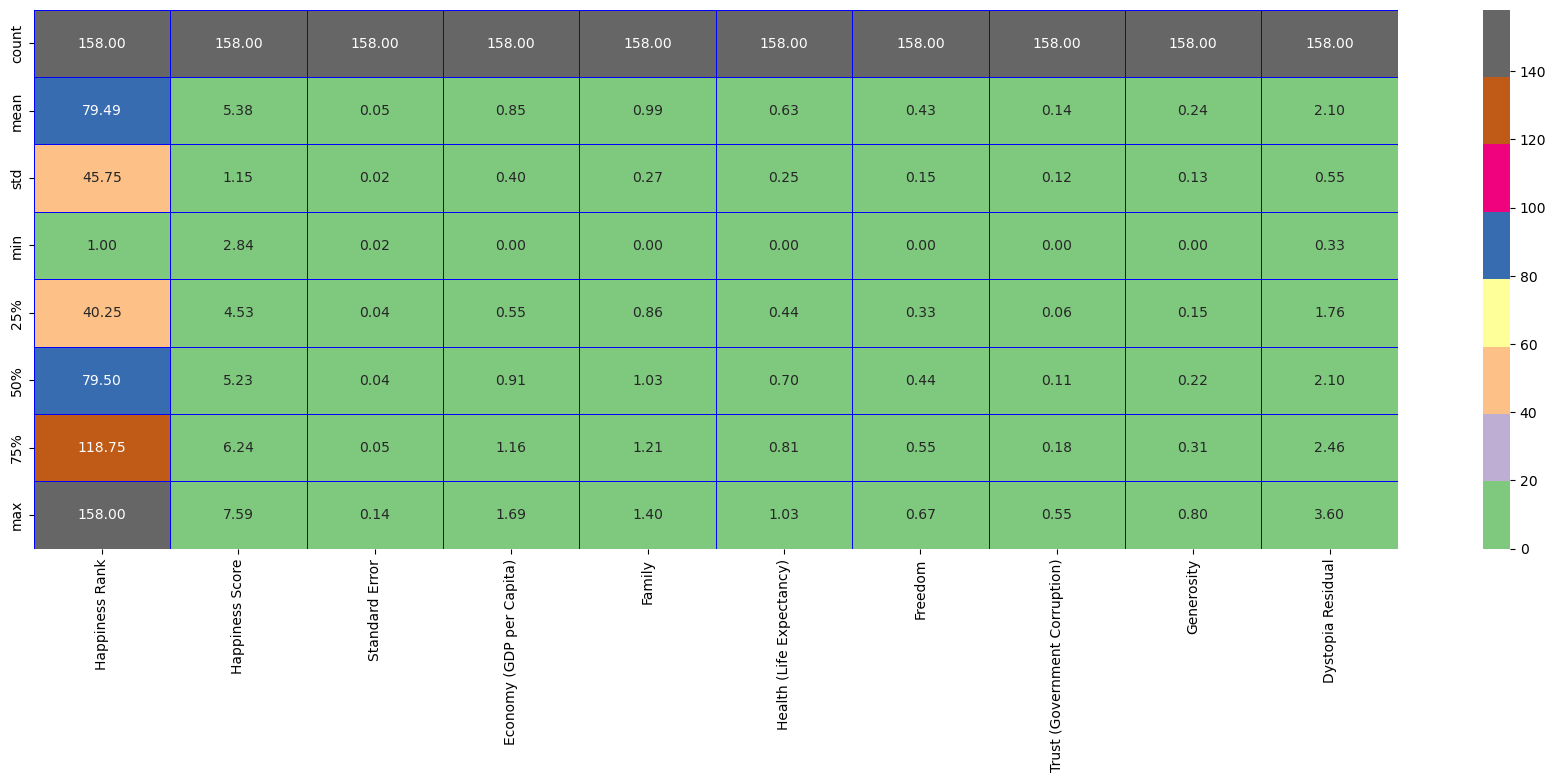

In [122]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='blue',fmt='0.2f',cmap='Accent')

In [123]:
# checking the correlation 
df_nominal.corr()

,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy),Family,Freedom,Trust (Government Corruption),Generosity
Happiness Rank,1.000000,-0.785267,-0.735613,-0.733644,-0.556886,-0.372315,-0.160142
Economy (GDP per Capita),-0.785267,1.000000,0.816478,0.645299,0.370300,0.307885,-0.010465
Health (Life Expectancy),-0.735613,0.816478,1.000000,0.531104,0.360477,0.248335,0.108335
Family,-0.733644,0.645299,0.531104,1.000000,0.441518,0.205605,0.087513
Freedom,-0.556886,0.370300,0.360477,0.441518,1.000000,0.493524,0.373916
Trust (Government Corruption),-0.372315,0.307885,0.248335,0.205605,0.493524,1.000000,0.276123
Generosity,-0.160142,-0.010465,0.108335,0.087513,0.373916,0.276123,1.000000


In [124]:
df_nominal.skew()

Happiness Rank                   0.000418
Economy (GDP per Capita)        -0.317575
Health (Life Expectancy)        -0.705328
Family                          -1.006893
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
dtype: float64

# checking for outliers

<AxesSubplot:>

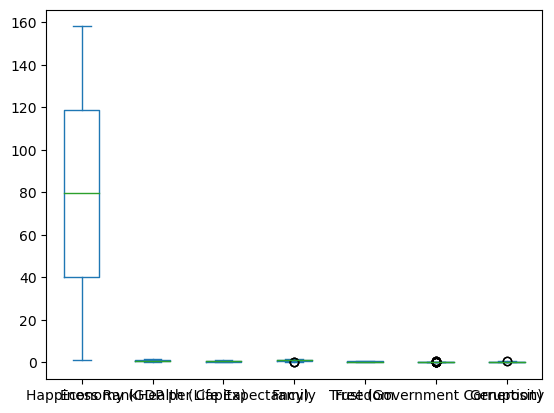

In [125]:
df_nominal.plot.box()

In [126]:
from scipy .stats import zscore
import numpy as np
z=np.abs(zscore(df_nominal))
threshold=3
np.where(z>3)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [127]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [128]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
    lr.fit(x_train,y_train)
    pred_tran=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(" at random state{i},the training accuracy is '{r2_score(y_train,pred_tran)}")
    print(" at random state{i},the training accuracy is '{r2_score(y_test,pred_test)}")
    print("\n")
    
    

ValueError: could not convert string to float: 'Western Europe'